In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Flatten, Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the Xception model
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="C://Users//mukul//Documents//#Programing//Skin_Pigment_Analysis//xception_weights_tf_dim_ordering_tf_kernels_notop.h5",
    input_shape=(224, 224, 3),
)

In [3]:
# Making layers of base model untrainable so that their weights won't change during training
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Defining the input and output layers of the base model
base_input = base_model.layers[0].input
base_output = base_model.layers[-1].output

In [5]:
# Adding the output layers to the base model
l1 = Flatten()(base_output)
l2 = Dense(512, activation='elu')(l1)
l3 = Dropout(0.25)(l2)
l4 = Dense(8, activation='softmax')(l3)

model = tf.keras.Model(inputs=base_input, outputs=l4)

In [6]:
# Summary of the model
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [7]:
# Compiling the model i.e selecting the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [9]:
#Importing the data and augmenting it:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.15,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'C://Users//mukul//Documents//#Programing//Skin_Pigment_Analysis//Dataset//Train',
        target_size=(224, 224),
        batch_size=100,
        class_mode='categorical')


valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow_from_directory(
        'C://Users//mukul//Documents//#Programing//Skin_Pigment_Analysis//Dataset//Valid',
        target_size=(224, 224),
        batch_size=35,
        class_mode='categorical')

Found 1050 images belonging to 8 classes.
Found 356 images belonging to 8 classes.


In [10]:
# Setting up the callbacks

# checkpoint_cb will save the model which will perform the best on validation set
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('C://Users//mukul//Documents//#Programing//Skin_Pigment_Analysis//best_model.h5', save_best_only=True)

# early_stoping_cb will stop the model traning once it stops improving
early_stoping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [11]:
# training the model
# regularization
history = model.fit(
      train_generator,
      steps_per_epoch=10,
      validation_data=(valid_generator),
      callbacks=[checkpoint_cb, early_stoping_cb],  
      epochs=20,
      verbose=1)

Epoch 1/20
10/10 [==============================] - 103s 10s/step - loss: 16.2563 - acc: 0.3989 - val_loss: 3.0991 - val_acc: 0.5646
Epoch 2/20
10/10 [==============================] - 110s 11s/step - loss: 2.6302 - acc: 0.5663 - val_loss: 1.7465 - val_acc: 0.5730
Epoch 3/20
10/10 [==============================] - 107s 11s/step - loss: 1.4239 - acc: 0.5621 - val_loss: 1.1497 - val_acc: 0.6264
Epoch 4/20
10/10 [==============================] - 112s 11s/step - loss: 1.1100 - acc: 0.6280 - val_loss: 1.1117 - val_acc: 0.6657
Epoch 5/20
10/10 [==============================] - 108s 11s/step - loss: 0.9229 - acc: 0.6758 - val_loss: 1.0681 - val_acc: 0.6798
Epoch 6/20
10/10 [==============================] - 107s 11s/step - loss: 0.9400 - acc: 0.6905 - val_loss: 0.9028 - val_acc: 0.7107
Epoch 7/20
10/10 [==============================] - 102s 10s/step - loss: 0.8845 - acc: 0.6937 - val_loss: 0.9871 - val_acc: 0.6770
Epoch 8/20
10/10 [==============================] - 107s 11s/step - loss: 0

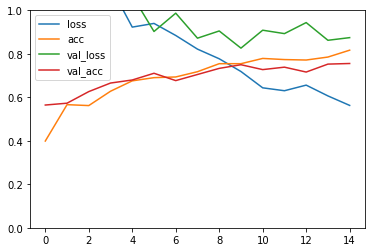

In [12]:
# Performance of the model on training and validation sets
pd.DataFrame(history.history).plot()
plt.gca().set_ylim(0, 1)
plt.show()